### 位相推定アルゴリズム

最終目標である位相推定アルゴリズムについて紹介する。上記のアダマールテストをより精度が良くなるように、測定側の量子ビットを拡張したのが、Kitaevによって提案された位相推定アルゴリズムである。詳細はともかく、どのような操作ができるアルゴリズムなのかを、まず紹介しよう。
　$U$を量子回路として構成できる一般的なユニタリ行列とする。$U$の固有ベクトルと$|{\rm eigen} _i \rangle$とし、対応する固有値を$|\lambda _i \rangle$とする。ある一般的な量子状態$|\psi\rangle$が与えられたとする。これは必ず固有ベクトルで展開できる：
$$
|\psi \rangle = \sum _i c_i |{\rm eigen}_i \rangle
$$
もちろん具体的にc_iがどのような値になるかはわからなくてよい。このとき位相推定アルゴリズムは、$r$個の補助量子ビットを用いて、入力状態
$$
|00...0\rangle | \psi \rangle
$$
を、
$$
\sum _i c_i |\lambda_i \rangle | {\rm eigen_i} \rangle 
$$
へと変換するアルゴリズムのことである。重ね合わせの中にあるそれぞれの固有ベクトルに対応した固有値を$r$個の補助量子ビットへと取り出すアルゴリズムになっている。この状態に対して測定をすると、確率 
$$
p_i = |c_i |^2
$$
で、どれか一つの固有ベクトルとその固有値が乱拓される。このアルゴリズムは、素因数分解や分子などのエネルギー計算のための量子化学アルゴリズム、そしてその他多くのアルゴリズムのサブルーチンとして利用されていおり、量子コンピュータが従来コンピュータよりも指数的に高速に特定の問題において解を得られる（と期待されている）最も重要な例である。

以下では、入力状態を固有状態$|{\rm eigen}\rangle$とその固有値$\lambda$に限定して、位相推定アルゴリズムを説明していくことにする。しかし、線形和をとっても全く同じ議論が使えるので一般性は失われていない。 アダマールテストでは1つしか測定用の量子ビットを使わなかった。位相推定では、測定用の補助量子ビットとして$r$個の量子ビットを確保する。
図（figure02.pdf）のように$r$個の量子ビットを用いて、
アダマールテストと同様に制御ユニタリー演算をさよう。
ただし、$k$番目（$k=0,1,...,r-1$）の補助量子ビットは制御$U^{2^k}$演算
をすることにする。
ユニタリー演算$U$の固有値の位相$\lambda$を$r$ビットの２進小数を用いて
\begin{eqnarray}
\lambda = (2\pi) 0.j_1 j_2...j_r
\end{eqnarray}
と書いておく。２進小数は$0.1=1/2、0.01=1/4、0.11=3/4$のように１未満の実数をビット列で表示したものだ。
アダマールテストと同様に
$k$番目のプローブ量子ビットには$e^{i \lambda 2^k}$
の位相が獲得される（位相キックバック）ので
\begin{eqnarray}
\bigotimes _{k=0}^{r-1} \frac{|0\rangle + e^{i (2\pi)0.j_{r-k}...j_r} |1\rangle }{\sqrt{2}}
\otimes |{\rm eigen} \rangle
\end{eqnarray}
のような状態が得られていることになる。
固有値の位相が２進数小数表示で1ビットずつシフトしたものが
各プローブ量子ビットに格納されている。
この$r$個のプローブ量子ビットに対してフーリエ変換（の逆）の量子版、逆量子フーリエ変換
\begin{eqnarray}
\bigotimes _{k=0}^{r-1} \frac{|0\rangle + e^{i (2\pi)0.j_{r-k}...j_r} |1\rangle }{\sqrt{2}}
\rightarrow |j_1...j_r\rangle
\end{eqnarray}
を作用させると、プローブ量子ビットに
ビット列 $j_1...j_r$ が得られ、位相の２進小数が得られる。
これが位相推定アルゴリズムである。逆量子フーリエ変換の構成方法については例題でみていくことにする。

SymPyで具体例を見ていこう。T演算とS演算を用いて以下のような4×4行列をつくる。

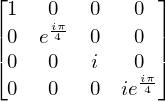

In [4]:
from IPython.display import Image, display_png
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため
from sympy.physics.quantum.gate import CGateS
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE

represent(T(0)*S(1),nqubits = 2)

演算子は何番目の量子ビットに作用するか、
というのを指定して `X(0)` のように定義する。
また、これを行列表示するときには、いくつの量子ビットの空間で表現するか 
`nqubits`というのを指定する必要がある。
まだ、量子ビットは１つしかいないので、
`X(0)`、`nqubits=1`としておこう。

すでに対角化されており、固有値の位相の２進数表示は、0.0,0.001,0.01,0.011,であり３つの補助量子ビットが必要である。` CGateS ` を用いてこれを制御化した ` cP_2,3,4 `を定義しよう。（2,3,4が３つの補助量子ビットに対応している。）

In [5]:
cP_2 = CGateS(2,T(0))*CGateS(2,S(1))
cP_3 = CGateS(3,T(0))*CGateS(3,S(1))
cP_4 = CGateS(4,T(0))*CGateS(4,S(1))

３つの補助量子ビットを用いて、位相推定アルゴリズムを構成していこう。

In [6]:
PhaEst = H(4)*H(3)*H(2)
PhaEst

制御ユニタリーをそれぞれ、1回、２回、４回と作用させていく。

In [7]:
PhaEst = cP_2*cP_3*cP_3*cP_4*cP_4*cP_4*cP_4*PhaEst

まず、補助量子ビット4には、位相キックバックが4=2^2回作用しているので、２進小数の第3位が小数第1位まで桁上がりしている。ここら逆量子フーリエ変換に対応するところを構築する。目標は位相には行ったビット列を、直接量子ビット列として取り出すような変換をすることである。小数第3位については簡単である。すでに補助量子ビット4の位相に小数第１として出現している（４回作用させたので小数点が２つシフトした）。よって、H演算を作用させて測定すれば小数第3位が0か1が補助量子ビット4に取り出されることになる。

In [8]:
PhaEst = H(4)*PhaEst

補助量子ビット3は、小数第２位が小数第１位まで桁上がりしている。また、小数第2位には第3位が残っている。この小数第3位を消すために、補助量子ビット4から制御$SZ=S^{-1}$演算を作用させる。

In [9]:
PhaEst = CGateS(4,S(3))*PhaEst
PhaEst = CGateS(4,Z(3))*PhaEst

小数第1位だけに小数第2位が格納させているので、H演算をして0もしくは1として直接取り出すことができる。

In [27]:
PhaEst = H(3)*PhaEst

最後に補助量子ビット2には、小数第1位から3位までそのまま入っているので、補助量子ビット、3,4をつかって、第1位以外を消す操作をさっきと同様に行う。

In [10]:
PhaEst = CGateS(3,S(2))*PhaEst
PhaEst = CGateS(3,Z(2))*PhaEst

In [11]:
PhaEst = CGateS(4,T(2))*PhaEst
PhaEst = CGateS(4,S(2))*PhaEst
PhaEst = CGateS(4,Z(2))*PhaEst
PhaEst = H(2)*PhaEst

以上のように、帰納的に小数第1位しか残らないように量子演算を作用させて第2位以降をキャンセルし、H演算によってビット列をとりだすサブルーチンが逆量子フーリエ変換である。

このように構成した位相推定アルゴリズムを固有ベクトルに作用させてみよう。アルゴリズム自体は非常に複雑だ。

しかし実際、入力に作用させると、